In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from scipy.stats import ranksums

In [35]:
def plot_hist(datatype):
    if datatype == 'cancer':
        lt2= scipy.io.loadmat('./Jacc_sim/cancer_models/JC_LT2.mat')
        lg= scipy.io.loadmat('./Jacc_sim/cancer_models/JC_LocalGiniModels.mat')
        sd= scipy.io.loadmat('./Jacc_sim/cancer_models/JC_StanDep.mat')
        xlabel = 'Jaccard index between models built from same cancer cell-line data'
    elif datatype == 'tissue':
        lt2= scipy.io.loadmat('./Jacc_sim/tissue_models/JC_LT2.mat')
        lg= scipy.io.loadmat('./Jacc_sim/tissue_models/JC_LocalGiniModels.mat')
        sd= scipy.io.loadmat('./Jacc_sim/tissue_models/JC_StanDep.mat')
        xlabel = 'Jaccard index between models built from same tissue data'
    alpha=0.7
    fig,axes = plt.subplots(2,1,figsize=(15,20))
    sns.histplot(lg['sims'][0], ax=axes[0],label = 'Localgini',bins=np.linspace(0.1,1,37),alpha= alpha,color='g')
    sns.histplot(sd['sims'][0], ax=axes[0],label = 'StanDep',bins=np.linspace(0.1,1,37),alpha= alpha,color ='royalblue')
    p_lg_sd = ranksums(lg['sims'][0],sd['sims'][0],alternative='greater')
    print('The p-value for the ranksum test between LocalGini and StanDep is:',p_lg_sd.pvalue)
    sns.histplot(lg['sims'][0], ax=axes[1],label = 'Localgini',bins=np.linspace(0.1,1,37),alpha= alpha,color='g')
    sns.histplot(lt2['sims'][0], ax=axes[1],label = 'LocalT2',bins=np.linspace(0.1,1,37),alpha= alpha,color='darkorange')
    p_lg_lt2 = ranksums(lg['sims'][0],lt2['sims'][0],alternative='greater')
    print('The p-value for the ranksum test between LocalGini and LocalT2 is:',p_lg_lt2.pvalue)
    # a.set_title(tit,fontdict={'weight': 'bold','size': 12 })
    for ax in axes:
        ax.set_yticks(np.arange(0,100,10))
        ax.set_yticklabels(ax.get_yticks(),fontdict={'weight': 'bold','size':20 })
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
        ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1.0],fontdict={'weight': 'bold','size': 20 })
        ax.legend(loc='upper right',fontsize= 20 )
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xlabel(xlabel,fontsize=25,fontweight='bold')
        ax.set_ylabel('Count',fontweight='bold',fontsize=25)
        # ax.set_facecolor("white")
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')
    plt.savefig(f'JC_bw_models_{datatype}.pdf',bbox_inches='tight')

The p-value for the ranksum test between LocalGini and StanDep is: 9.302787213513592e-50
The p-value for the ranksum test between LocalGini and LocalT2 is: 2.0117260764979658e-22


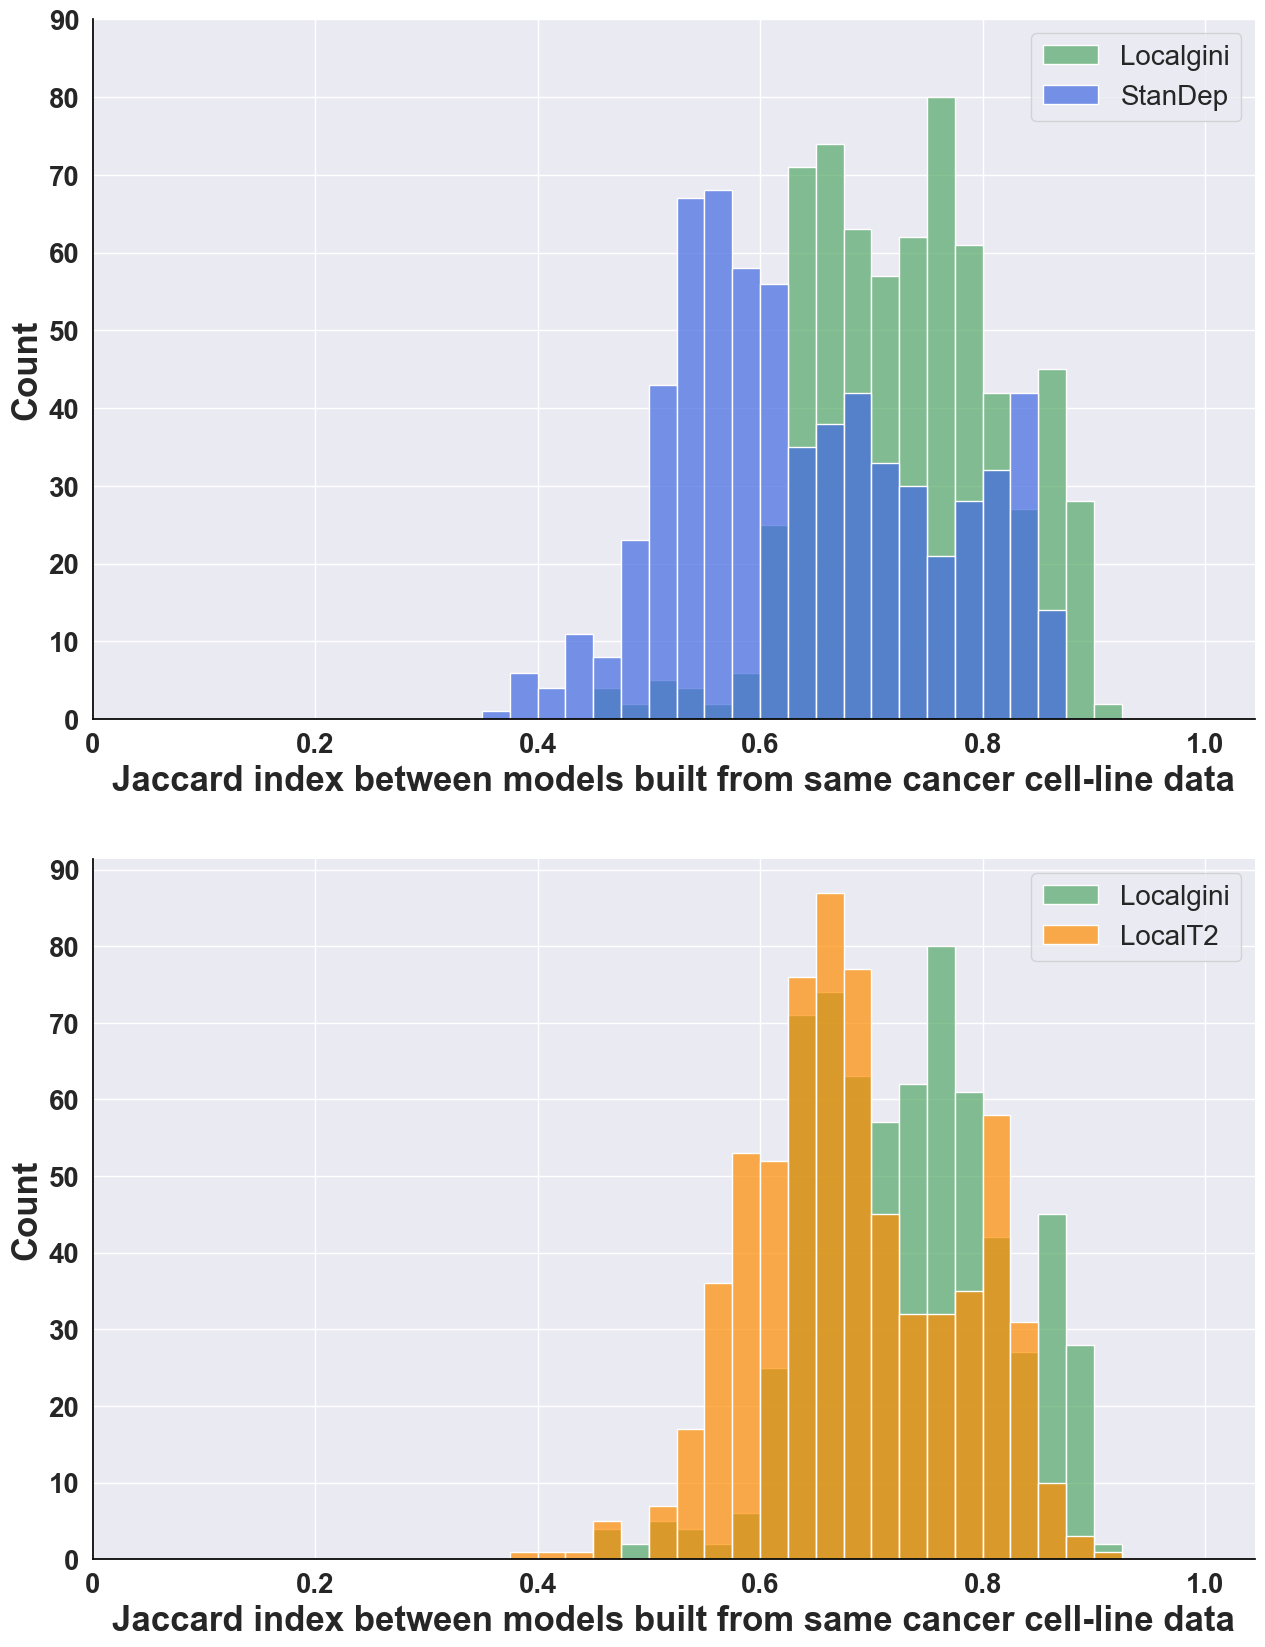

In [37]:
plot_hist('cancer')

The p-value for the ranksum test between LocalGini and StanDep is: 1.267348469649287e-41
The p-value for the ranksum test between LocalGini and LocalT2 is: 2.666478083825625e-67


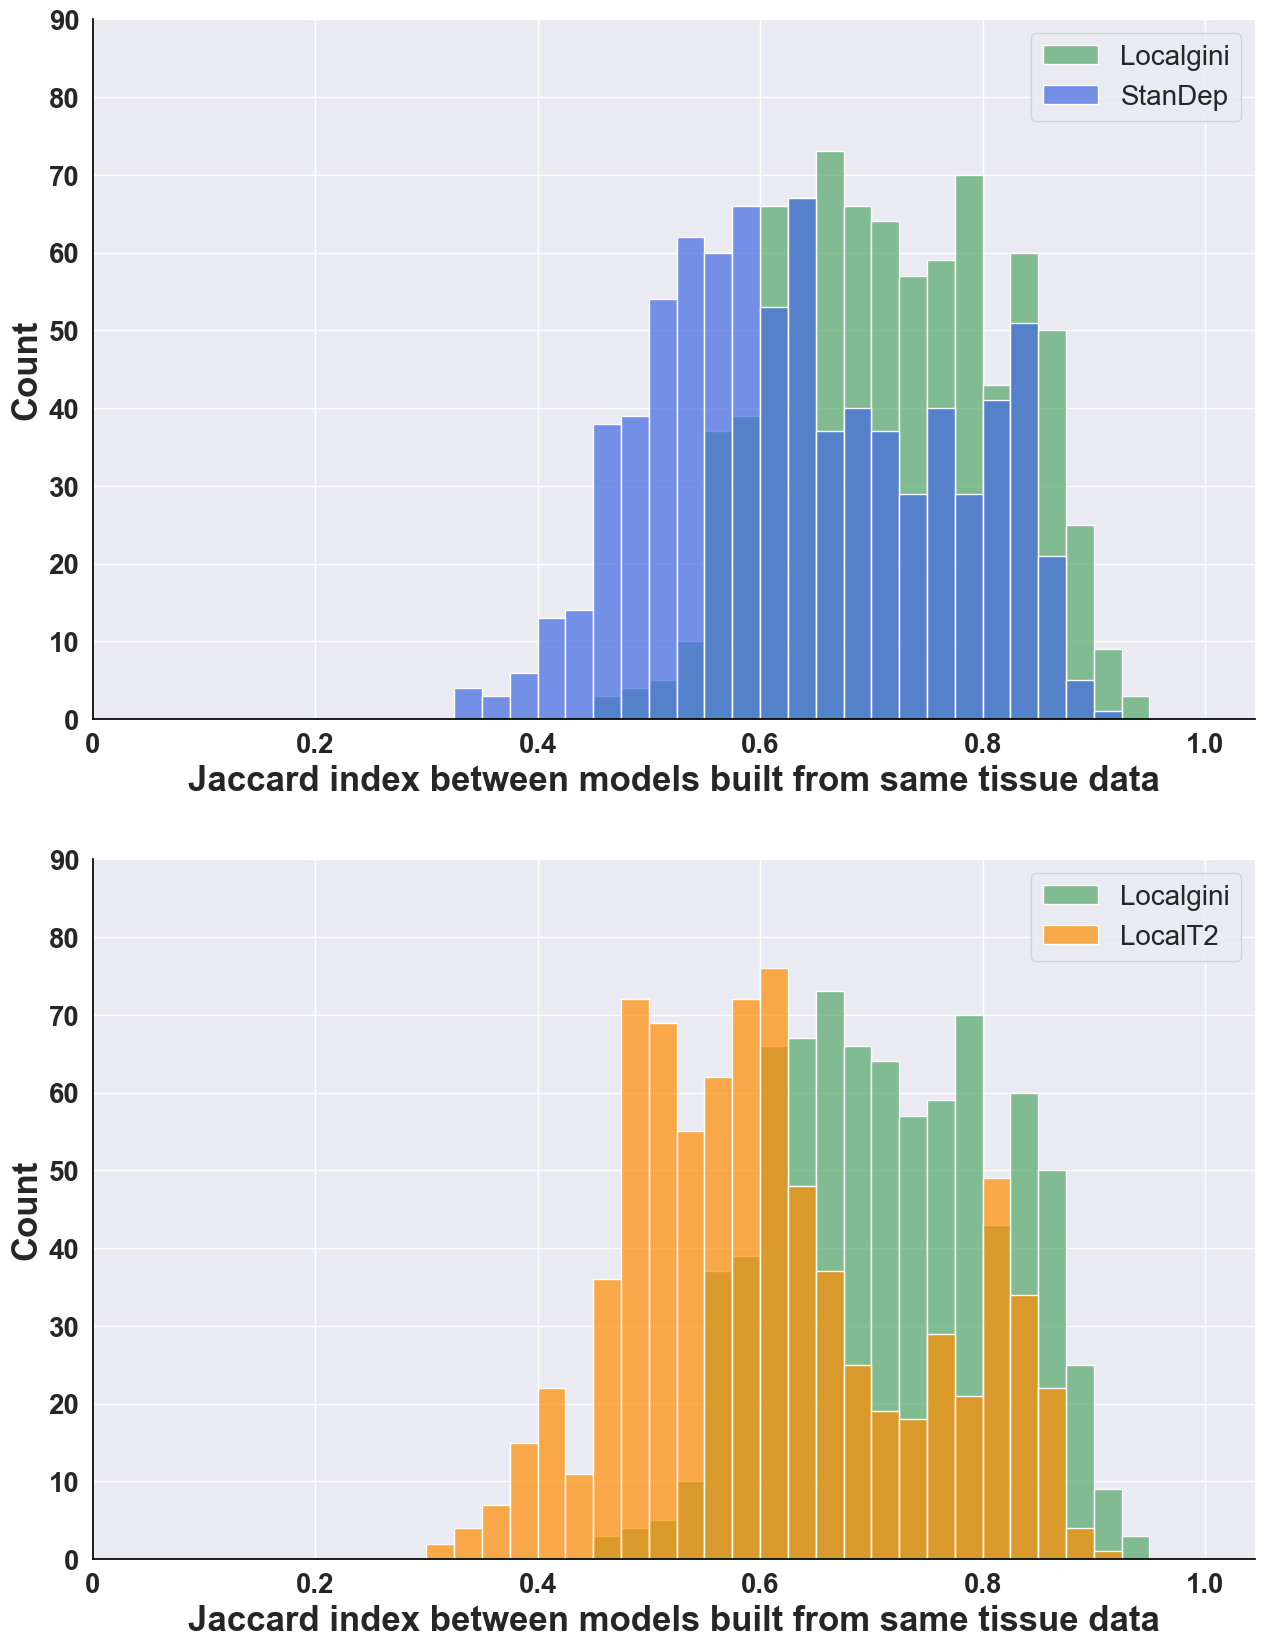

In [38]:
plot_hist('tissue')